"Feature Pyramid Networks for Object Detection"发表于2016年，提出一种特征融合的方式，利用多尺度特征金字塔来输出预测结果，提升了目标检测尤其是小目标检测的精度。

特征金字塔的各种方式如下：(a)是图像金字塔，由于其计算开销，一般只在测试时用；(b)是一般的前馈网络；(c)是多尺度特征，类似SSD；（d）是FPN
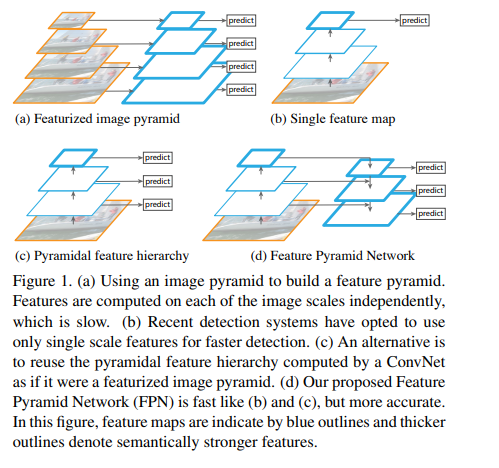

FPN中的每一层均是一个block的最后一层的输出（即block的输出）

也有前人用特征金字塔，但输出只是用最下面一层，而FPN是多尺度输出
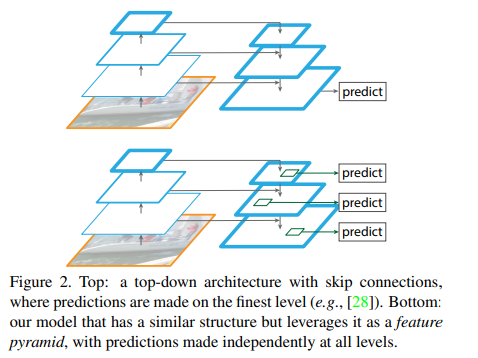

FPN的block如下图所示，经过feedforward后，最上面特征图经过upsample，尺度变为原来的2倍，然后与feedforward的倒数第二层add，然后得到的特征图再经过upsample，与feedforward的倒数第三层add，...
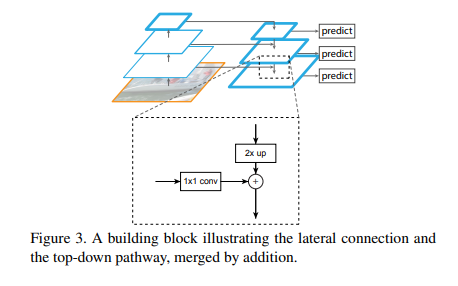

FPN特征金字塔最终都是256维的特征图

将FPN应用于RPN:<br/>
faster rcnn中，基础网路输出的特征图输入到RPN网络，而FPN将基础网络的特征图改为特征金字塔，然后后面的二分类head与regression head共享参数。faster rcnn的rpn中，用多种scale的anchor，但FPN是特征金字塔每一层只用一种scale，特征金字塔的5层分别用$\{32^2,64^2,128^2,256^2,512^2\}$，长宽比用$\{1:2,1:1，2：1\}$

将FPN应用于faster rcnn中的fast rcnn:<br/>
基础网络输出的特征图改造为特征金字塔，然后对于RPN产生的每一个roi，被分配到对应的特征金字塔的层，用如下公式：
$$
k = floor(k_0 + log_2(\sqrt{wh}/224))
$$
$其中，224是imagenet的标准输入，floor是向下取整，k_0为224x224的roi对应的层，文中设为\\4，w与h为ROI的宽高.例如，112x112的roi区域，k=floor(4+log_2(\sqrt{112*112} / 224)) = \\3，即该roi区域应该被映射到特征金字塔的第3层$<br/>
所有的roi区域共享后续网络(文中使用fc层而不是conv)

此外，作者通过实验发现，在单个特征图上单纯增加anchor数量并不能带来精度上的提升。

FPN在应用于faster rcnn时，以resnet论文中faster rcnn的实现作为基础，而应用以下方法对基础进行改进，提升了7.6个点：<br/>
1)输入尺寸设为800(resnet中设为600)<br/>
2)每张图片用512个rois(fast rcnn阶段的batch_size设为512)<br/>
3)用5个anchor scale，多了一个32x32（resnet用4个）<br/>
4)测试阶段每张图像用1000个候选区域（resnet用300个）